# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url)

# Fetch current ETH price
eth_response = requests.get(eth_url)

# Compute current value of my crpto
import json 
btc_data = btc_response.json()
eth_data= eth_response.json()
#print(json.dumps(eth_data, indent=4))
btc_current_price = btc_data['data']['1']['quotes']['USD']['price']
my_btc_value = my_btc * btc_current_price
eth_current_price = eth_data['data']['1027']['quotes']['USD']['price']
my_eth_value = my_eth * eth_current_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $28614.00
The current value of your 5.3 ETH is $8748.92


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
api_key = os.getenv('APCA_API_KEY_ID')
api_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    api_key,
    api_secret_key,
    api_version = 'v2'
)
    

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2023-01-27", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Reorganize the DataFrame
# Separate ticker data

AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol',axis = 1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                              \
                            open    high    low   close   volume trade_count   
timestamp                                                                      
2023-01-27 05:00:00+00:00  99.96  100.14  99.91  100.08  5123098       18192   

                                           SPY                          \
                                 vwap     open    high     low   close   
timestamp                                                                
2023-01-27 05:00:00+00:00  100.061411  403.655  408.16  403.44  405.68   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-01-27 05:00:00+00:00  68346180      496480  405.790293

In [9]:
# Pick AGG and SPY close prices
spy_close = float(df_portfolio['SPY']['close'])
agg_close = float(df_portfolio['AGG']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $100.08
Current SPY closing price: $405.68


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close
my_agg_value = my_agg * agg_close

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20284.00
The current value of your 200 AGG shares is $20016.00


### Savings Health Analysis

In [39]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto = my_btc_value + my_eth_value
total_shares = my_spy_value + my_agg_value
portfolio = {"crypto" : total_crypto , 
             "shares" : total_shares
            }

# Create savings DataFrame
df_savings = pd.DataFrame(portfolio, columns = ['total value'], index= ['crypto', 'shares'])
df_savings['total value']['crypto'] = total_crypto
df_savings['total value']['shares'] = total_shares

# Display savings DataFrame
df_savings

total value
crypto   37362.922
shares     40300.0

array([<AxesSubplot:ylabel='total value'>], dtype=object)

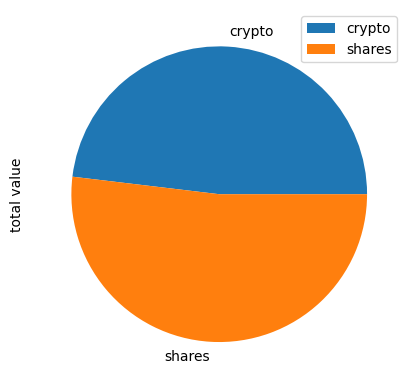

In [45]:
# Plot savings pie chart
df_savings.plot(kind = 'pie', subplots = True)

In [50]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations, you have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print(f"Congratulations on reaching this financial milestone")
else:
    savings_togo = emergency_fund - total_savings
    print(f"You are ${savings_togo} away from your financial goal")

Congratulations, you have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [55]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df



# Reorganize the DataFrame
# Separate ticker data
AGG_five_years = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY_five_years = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol',axis = 1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG_five_years, SPY_five_years], axis = 1, keys = ['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [64]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
weights = [.6,.4]

MC_shares = MCSimulation(
    df_stock_data,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252 *30
)



In [66]:
# Printing the simulation input data
MC_shares.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [61]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_shares.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/taylorlittle/Documents/Bootcamp/python-homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2          3         4         5         6    \
0     1.000000  1.000000  1.000000   1.000000  1.000000  1.000000  1.000000   
1     0.998266  1.008489  0.995644   1.001256  0.996189  0.997228  1.003419   
2     0.996182  1.012183  1.005145   0.997466  0.996524  0.997128  1.001016   
3     0.997110  1.012846  1.002881   0.998596  1.005457  0.996100  0.991872   
4     1.000132  1.011809  1.003651   1.002991  1.016272  1.000921  0.988531   
...        ...       ...       ...        ...       ...       ...       ...   
7556  4.792833  9.115813  9.468411  10.689368  6.875426  5.967744  8.394554   
7557  4.859838  9.024515  9.416316  10.593104  6.835856  5.962726  8.352751   
7558  4.879248  9.112580  9.387757  10.598052  6.818937  5.944803  8.281090   
7559  4.907286  9.083565  9.451086  10.646646  6.805749  5.956890  8.187968   
7560  4.865745  9.118207  9.373313  10.636435  6.818557  5.905356  8.140827   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.006373  0.994586  1.005212  ...  0.997278  0.998078  1.002590   
2     1.002312  0.992768  1.004531  ...  0.997338  1.000279  1.004609   
3     1.008141  0.995552  1.004188  ...  1.003948  0.999963  1.003798   
4     1.004379  0.998506  1.008044  ...  1.005244  1.006706  1.010949   
...        ...       ...       ...  ...       ...       ...       ...   
7556  4.723632  6.775166  8.434825  ...  6.082366  7.689011  5.020147   
7557  4.718480  6.794442  8.397985  ...  6.083280  7.659734  5.024529   
7558  4.719012  6.737279  8.372644  ...  6.101625  7.639139  5.044622   
7559  4.723381  6.818416  8.441956  ...  6.103744  7.601222  4.994438   
7560  4.723033  6.775204  8.416225  ...  6.106866  7.645822  4.995950   

           493       494       495       496        497       498       499  
0     1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  1.000000  
1     1.005466  1.003993  0.994631  0.992732   1.000560  1.004346  1.000069  
2     1.011895  1.005455  0.992335  0.989948   0.993185  1.003073  1.005905  
3     1.004725  1.003401  0.994394  0.996878   0.993630  1.000290  1.002945  
4     1.003718  1.002105  0.999013  1.002341   0.992544  1.003090  0.994158  
...        ...       ...       ...       ...        ...       ...       ...  
7556  9.557708  9.458385  8.304742  6.557466  22.225616  6.122141  9.675677  
7557  9.487505  9.514572  8.229441  6.511808  22.272529  6.080439  9.648621  
7558  9.433360  9.525721  8.221228  6.544637  22.247017  6.075259  9.568234  
7559  9.379678  9.591463  8.279180  6.594563  22.300684  6.099260  9.525817  
7560  9.431123  9.671417  8.248765  6.612753  22.078272  6.070457  9.538082  

[7561 rows x 500 columns]

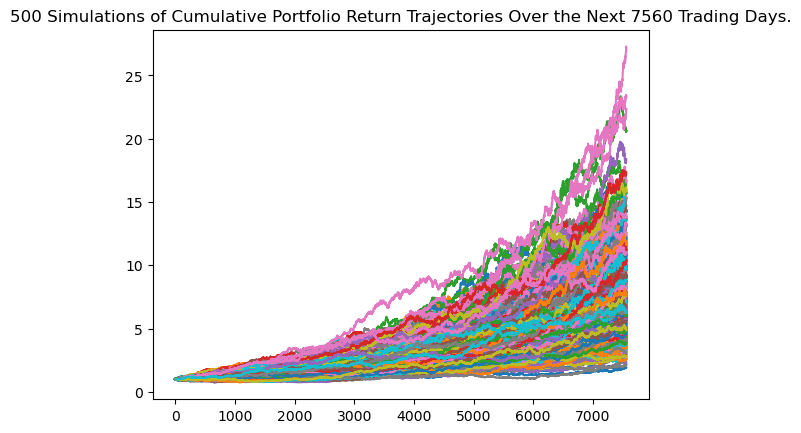

In [81]:
# Plot simulation outcomes
mc_plot = MC_shares.plot_simulation()

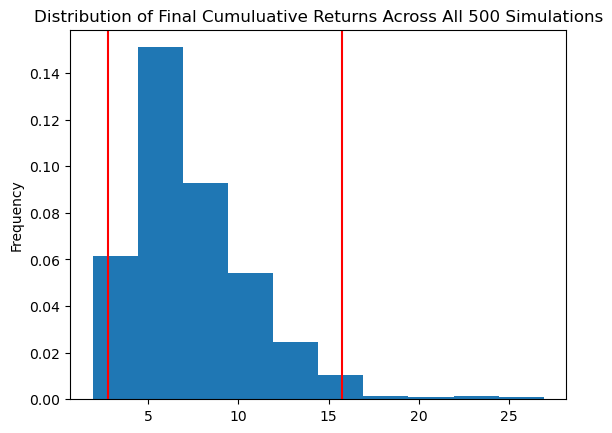

In [67]:
# Plot probability distribution and confidence intervals
dist_plot = MC_shares.plot_distribution()

### Retirement Analysis

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
shares_summ = MC_shares.summarize_cumulative_return()

# Print summary statistics
print(shares_summ)

count           500.000000
mean              7.490806
std               3.419349
min               1.922956
25%               5.095649
50%               6.742247
75%               9.197535
max              26.942614
95% CI Lower      2.792271
95% CI Upper     15.722225
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [72]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
shares_ci_lower = round(shares_summ[8]* initial_investment,2)
shares_ci_upper = round(shares_summ[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${shares_ci_lower} and ${shares_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $55845.41 and $314444.5


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [74]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
shares_ci_lower = round(shares_summ[8]* initial_investment,2)
shares_ci_upper = round(shares_summ[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${shares_ci_lower} and ${shares_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $83768.12 and $471666.75


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [76]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
five_year_MC = MCSimulation(
    df_stock_data,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252 * 5,
)

five_year_MC.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [78]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
five_year_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/taylorlittle/Documents/Bootcamp/python-homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.003621  1.006458  0.990615  0.996373  0.994395  0.994906  0.999961   
2     1.005650  1.005515  0.983445  0.998959  0.995219  1.004028  0.996052   
3     0.993829  1.007192  0.980923  1.002590  0.998141  1.008218  0.993172   
4     1.000172  1.008300  0.979119  1.004901  1.001647  1.007935  0.986931   
...        ...       ...       ...       ...       ...       ...       ...   
1256  0.995117  1.435776  1.729672  0.909812  1.386484  1.449791  1.399115   
1257  0.989495  1.430990  1.728628  0.902648  1.384898  1.451859  1.398105   
1258  0.989463  1.422165  1.730069  0.908006  1.380470  1.446555  1.391795   
1259  1.000490  1.420356  1.720286  0.906937  1.377916  1.439604  1.391797   
1260  0.990657  1.414286  1.727034  0.903321  1.376584  1.436184  1.393824   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.002936  1.007390  0.999975  ...  0.999806  0.999069  0.991470   
2     0.998768  1.008670  0.997949  ...  0.994482  1.005508  0.987769   
3     0.999452  1.005920  0.995999  ...  1.001160  1.002669  0.996914   
4     0.996166  0.997224  0.990567  ...  0.997543  0.997697  0.993658   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.142369  1.324435  1.545870  ...  1.529337  1.054139  1.181537   
1257  1.145907  1.321722  1.550550  ...  1.518241  1.051638  1.185544   
1258  1.152936  1.326621  1.544315  ...  1.527692  1.049007  1.192384   
1259  1.151940  1.335788  1.549027  ...  1.541800  1.047689  1.190482   
1260  1.154641  1.340857  1.548514  ...  1.544274  1.051143  1.191873   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.002199  0.988667  1.002260  1.007523  1.004033  1.001584  0.999727  
2     1.000570  0.987859  1.002652  1.009259  1.012562  1.005557  0.996710  
3     0.998606  0.989514  1.005242  1.009659  1.019028  1.006469  0.991111  
4     1.002179  0.993164  1.000140  1.007760  1.016739  1.014123  0.986722  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.306851  1.393496  1.631367  1.716088  1.112187  1.199382  1.647039  
1257  1.303544  1.393237  1.624556  1.718717  1.110739  1.195571  1.644329  
1258  1.308985  1.389165  1.621359  1.719729  1.117685  1.194668  1.639750  
1259  1.310115  1.395643  1.635282  1.723114  1.123339  1.201951  1.632609  
1260  1.309263  1.387620  1.634263  1.725315  1.126440  1.202519  1.647809  

[1261 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

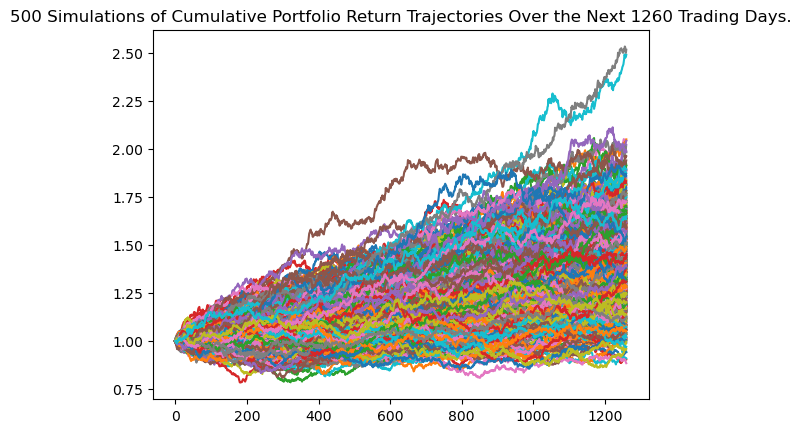

In [79]:
# Plot simulation outcomes
five_year_MC.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

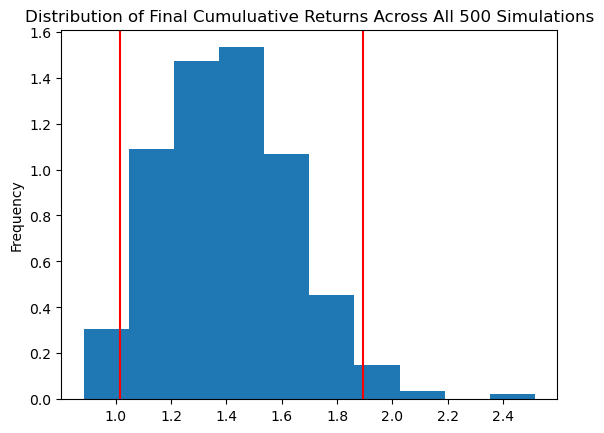

In [80]:
# Plot probability distribution and confidence intervals
five_year_MC.plot_distribution()

In [83]:
# Fetch summary statistics from the Monte Carlo simulation results
five_year_summ = five_year_MC.summarize_cumulative_return()

# Print summary statistics
print(five_year_summ)

count           500.000000
mean              1.404680
std               0.239040
min               0.884144
25%               1.235711
50%               1.389438
75%               1.559340
max               2.515862
95% CI Lower      1.014277
95% CI Upper      1.895311
Name: 1260, dtype: float64


In [84]:
# Set initial investment
five_year_initial = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_year_summ[8]* five_year_initial,2)
ci_upper_five = round(five_year_summ[9]* five_year_initial,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $50713.86 and $94765.54


### Ten Years Retirement Option

In [86]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_MC = MCSimulation(
    df_stock_data,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252 * 10,
)

In [87]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
ten_year_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/taylorlittle/Documents/Bootcamp/python-homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.008070  1.003043  1.002575  1.001377  0.999803  1.001545  1.004025   
2     1.008592  1.011336  1.007411  1.004012  0.997674  0.995603  1.005764   
3     1.009128  1.018314  1.001414  1.014815  0.996783  0.995122  1.010937   
4     1.012489  1.020601  1.002944  1.016547  1.000437  0.993172  1.006315   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.004081  1.267481  2.207010  1.788802  2.393098  3.309699  2.127625   
2517  1.997920  1.272143  2.210336  1.784115  2.370934  3.330375  2.126046   
2518  2.003335  1.272926  2.199395  1.767692  2.356897  3.325982  2.124454   
2519  2.009829  1.269493  2.177886  1.773509  2.362346  3.334190  2.122923   
2520  2.005340  1.268242  2.195069  1.770293  2.363201  3.337960  2.118269   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.992493  1.000937  0.996461  ...  1.000182  1.004169  1.002068   
2     0.983609  1.002525  0.999246  ...  1.016692  1.006676  1.007987   
3     0.987464  1.000417  1.003541  ...  1.010641  1.008284  1.007734   
4     0.992402  1.001187  1.001049  ...  1.006733  1.015199  1.008466   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.898000  2.443763  1.958187  ...  1.788341  1.784604  1.305526   
2517  1.900041  2.451334  1.943991  ...  1.800731  1.792716  1.295670   
2518  1.911855  2.448368  1.952873  ...  1.806335  1.796160  1.297219   
2519  1.900415  2.434637  1.935494  ...  1.812681  1.778813  1.293136   
2520  1.924676  2.449781  1.944202  ...  1.810998  1.796617  1.288210   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.002567  1.004517  0.995720  0.998915  0.998939  1.007078  0.998027  
2     1.006643  0.996720  0.994616  0.998413  1.003040  1.005168  1.004044  
3     0.999094  0.993947  0.995471  0.995394  1.001682  1.011307  1.001892  
4     1.001902  0.993418  0.997832  0.994308  0.996175  1.016348  1.005041  
...        ...       ...       ...       ...       ...       ...       ...  
2516  2.043170  1.774269  2.542167  1.409432  2.721575  1.859049  1.899495  
2517  2.023005  1.786362  2.544801  1.401259  2.725583  1.846237  1.893154  
2518  2.041012  1.796613  2.557540  1.387403  2.728029  1.838662  1.894843  
2519  2.031335  1.796704  2.582200  1.396724  2.712385  1.845591  1.902954  
2520  2.023641  1.794455  2.591931  1.394558  2.709665  1.849933  1.897101  

[2521 rows x 500 columns]

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

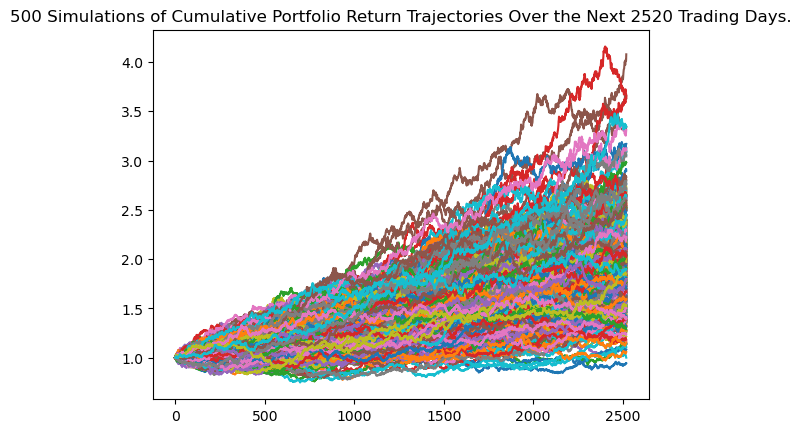

In [88]:
# Plot simulation outcomes
ten_year_MC.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

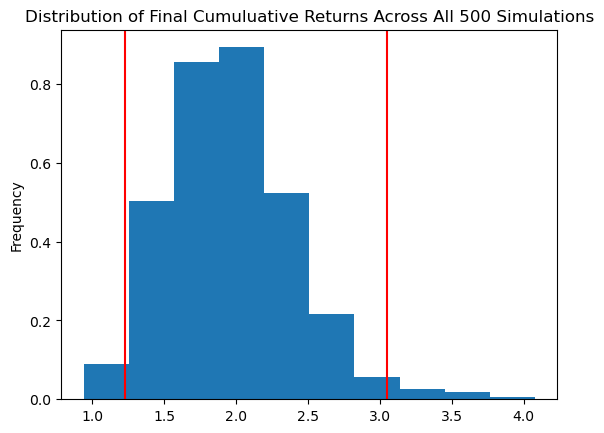

In [89]:
# Plot probability distribution and confidence intervals
ten_year_MC.plot_distribution()

In [90]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_summ = ten_year_MC.summarize_cumulative_return()

# Print summary statistics
print(ten_year_summ)

count           500.000000
mean              1.961268
std               0.448136
min               0.942488
25%               1.637049
50%               1.944146
75%               2.205052
max               4.077823
95% CI Lower      1.225799
95% CI Upper      3.050522
Name: 2520, dtype: float64


In [92]:
# Set initial investment
ten_year_initial = five_year_initial

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_year_summ[8]* ten_year_initial,2)
ci_upper_ten = round(ten_year_summ[9]* ten_year_initial,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $61289.95 and $152526.1
